In [107]:
import statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.matrics import 

In [2]:
df = pd.read_csv("Crops_price.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Commodities(rs/quin)  29 non-null     object 
 1   2002                  29 non-null     object 
 2   2004                  29 non-null     object 
 3   2005                  29 non-null     object 
 4   2006                  29 non-null     float64
 5   2007                  29 non-null     float64
 6   2008                  29 non-null     float64
 7   2009                  29 non-null     float64
 8   2010                  29 non-null     float64
 9   2011                  29 non-null     int64  
 10  2012                  29 non-null     object 
dtypes: float64(5), int64(1), object(5)
memory usage: 2.6+ KB


In [4]:
df['Commodities(rs/quin)'] = df['Commodities(rs/quin)'].astype(str)

In [5]:
df['2002'].head(2)

0    550
1    580
Name: 2002, dtype: object

In [6]:
df.head(2)

,Commodities(rs/quin),2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Paddy (Common),550,560,570,580.0,645.0,850.0,950.0,1000.0,1080,1250
1,Paddy (Grade ‘A’),580,590,600,610.0,675.0,880.0,980.0,1030.0,1110,1280


In [7]:
df['Commodities(rs/quin)'].unique()

array(['Paddy (Common) ', 'Paddy (Grade ‘A’) ', 'Wheat ',
       'Jowar (Hybrid)', 'Jowar (Maldandi)', 'Bajra', 'Ragi', 'Maize ',
       'Barley ', 'Gram ', 'Masur', 'Arhar ', 'Moong ', 'Urad ',
       'Sugarcane (Statutory minimum price) a', 'Cotton F-414/H-777 ',
       'Cotton H-4 750 ', 'Groundnut ', 'Jute(TD-5) ',
       'Rapeseed/ mustard ', 'Sunflower ', 'Soyabean (Black) ',
       'Soyabean (Yellow) ', 'Safflower ', 'Toria ', 'Copra (milling) ',
       'Copra balls ', 'Sesamum ', 'Niger seed '], dtype=object)

In [8]:
df.isnull().sum()

Commodities(rs/quin)    0
2002                    0
2004                    0
2005                    0
2006                    0
2007                    0
2008                    0
2009                    0
2010                    0
2011                    0
2012                    0
dtype: int64

In [9]:
df.columns

Index(['Commodities(rs/quin)', '2002', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012'],
      dtype='object')

In [10]:
df.head(3)

,Commodities(rs/quin),2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Paddy (Common),550,560,570,580.0,645.0,850.0,950.0,1000.0,1080,1250
1,Paddy (Grade ‘A’),580,590,600,610.0,675.0,880.0,980.0,1030.0,1110,1280
2,Wheat,630,640,650,750.0,1000.0,1080.0,1100.0,1120.0,1285,1350


In [11]:
dfT = df.T

In [12]:
dfT.columns = dfT.iloc[0]

In [13]:
dfT = dfT[1:]

In [14]:
dfT.head(2)

Commodities(rs/quin),Paddy (Common),Paddy (Grade ‘A’),Wheat,Jowar (Hybrid),Jowar (Maldandi),Bajra,Ragi,Maize,Barley,Gram,...,Rapeseed/ mustard,Sunflower,Soyabean (Black),Soyabean (Yellow),Safflower,Toria,Copra (milling),Copra balls,Sesamum,Niger seed
2002,550,580,630,490,...,495,490,490,505,1225,...,1340,1210,805,895,1305,1305,3300,3550,1455,1120
2004,560,590,640,515,...,515,515,525,540,1425,...,1700,1340,900,1000,1550,1665,3500,3750,1500,1180


In [15]:
# dfT.rename(columns = {'Commodities(rs/quin)':'Years'}, inplace = True)

In [16]:
dfT.head(2)

Commodities(rs/quin),Paddy (Common),Paddy (Grade ‘A’),Wheat,Jowar (Hybrid),Jowar (Maldandi),Bajra,Ragi,Maize,Barley,Gram,...,Rapeseed/ mustard,Sunflower,Soyabean (Black),Soyabean (Yellow),Safflower,Toria,Copra (milling),Copra balls,Sesamum,Niger seed
2002,550,580,630,490,...,495,490,490,505,1225,...,1340,1210,805,895,1305,1305,3300,3550,1455,1120
2004,560,590,640,515,...,515,515,525,540,1425,...,1700,1340,900,1000,1550,1665,3500,3750,1500,1180


In [17]:
dfT.columns

Index(['Paddy (Common) ', 'Paddy (Grade ‘A’) ', 'Wheat ', 'Jowar (Hybrid)',
       'Jowar (Maldandi)', 'Bajra', 'Ragi', 'Maize ', 'Barley ', 'Gram ',
       'Masur', 'Arhar ', 'Moong ', 'Urad ',
       'Sugarcane (Statutory minimum price) a', 'Cotton F-414/H-777 ',
       'Cotton H-4 750 ', 'Groundnut ', 'Jute(TD-5) ', 'Rapeseed/ mustard ',
       'Sunflower ', 'Soyabean (Black) ', 'Soyabean (Yellow) ', 'Safflower ',
       'Toria ', 'Copra (milling) ', 'Copra balls ', 'Sesamum ',
       'Niger seed '],
      dtype='object', name='Commodities(rs/quin)')

In [18]:
dfT.index

Index(['2002', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012'],
      dtype='object')

In [19]:
cols = ['Paddy (Common) ', 'Paddy (Grade ‘A’) ', 'Wheat ', 'Jowar (Hybrid)',
       'Jowar (Maldandi)', 'Bajra', 'Ragi', 'Maize ', 'Barley ', 'Gram ',
       'Masur', 'Arhar ', 'Moong ', 'Urad ',
       'Sugarcane (Statutory minimum price) a', 'Cotton F-414/H-777 ',
       'Cotton H-4 750 ', 'Groundnut ', 'Jute(TD-5) ', 'Rapeseed/ mustard ',
       'Sunflower ', 'Soyabean (Black) ', 'Soyabean (Yellow) ', 'Safflower ',
       'Toria ', 'Copra (milling) ', 'Copra balls ', 'Sesamum ',
       'Niger seed ']
dfT[cols] = dfT[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [20]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2002 to 2012
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Paddy (Common)                         10 non-null     float64
 1   Paddy (Grade ‘A’)                      10 non-null     float64
 2   Wheat                                  10 non-null     float64
 3   Jowar (Hybrid)                         10 non-null     float64
 4   Jowar (Maldandi)                       7 non-null      float64
 5   Bajra                                  10 non-null     float64
 6   Ragi                                   10 non-null     float64
 7   Maize                                  10 non-null     float64
 8   Barley                                 10 non-null     float64
 9   Gram                                   10 non-null     float64
 10  Masur                                  9 non-null      float64
 11  Arhar   

In [21]:
# plt.plot(x = dfT.index , y = dfT['Paddy (Common) '].values)
# plt.x_label("Years")
# plt.y_label("Paddy Prices")
# plt.title('Line Plot of (Paddy Prices with Years)')

In [22]:
dfT.isnull().sum()

Commodities(rs/quin)
Paddy (Common)                           0
Paddy (Grade ‘A’)                        0
Wheat                                    0
Jowar (Hybrid)                           0
Jowar (Maldandi)                         3
Bajra                                    0
Ragi                                     0
Maize                                    0
Barley                                   0
Gram                                     0
Masur                                    1
Arhar                                    0
Moong                                    0
Urad                                     0
Sugarcane (Statutory minimum price) a    0
Cotton F-414/H-777                       0
Cotton H-4 750                           0
Groundnut                                0
Jute(TD-5)                               0
Rapeseed/ mustard                        0
Sunflower                                0
Soyabean (Black)                         0
Soyabean (Yellow)                

In [23]:
dfT['Masur'] = dfT['Masur'].fillna(dfT['Masur'].mean())
dfT['Toria '] = dfT['Toria '].fillna(dfT['Toria '].mean())
dfT['Jowar (Maldandi)'] = dfT['Jowar (Maldandi)'].fillna(dfT['Jowar (Maldandi)'].mean())

In [24]:
dfT.index.name = 'year'

In [25]:
dfT.index.name

'year'

In [26]:
# plt.plot(x = dfT.index, y = dfT['Paddy (Common) '])

Text(0.5, 1.0, 'plot of prices of paddy with time')

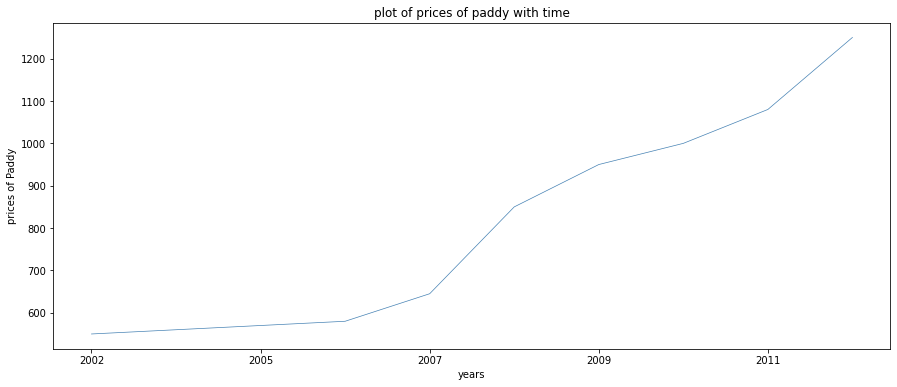

In [27]:
#plot

dfT['Paddy (Common) '].plot(color='steelblue', linewidth=0.7, figsize=(15,6))
plt.xlabel('years')
plt.ylabel("prices of Paddy")
plt.title("plot of prices of paddy with time")

In [28]:
dfT['SMA_5_years'] = dfT['Paddy (Common) '].rolling(5, min_periods=1).mean()

In [29]:
dfT['SMA_5_years']

year
2002     550.0
2004     555.0
2005     560.0
2006     565.0
2007     581.0
2008     641.0
2009     719.0
2010     805.0
2011     905.0
2012    1026.0
Name: SMA_5_years, dtype: float64

Text(0.5, 1.0, 'plot of prices of paddy with time')

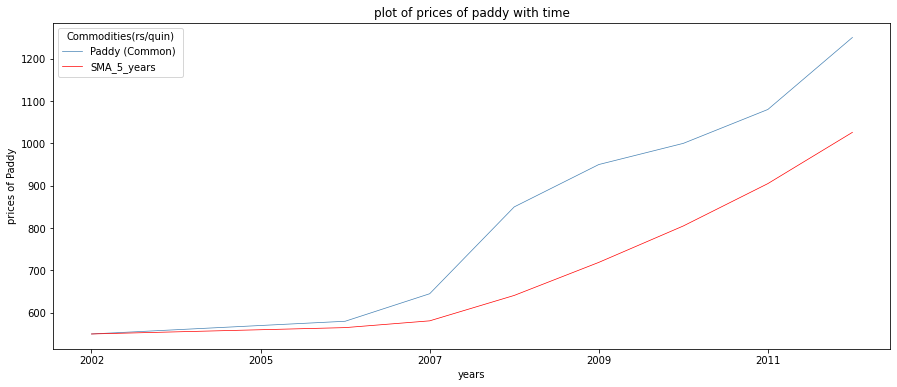

In [30]:
colors = ['steelblue','red']
dfT[['Paddy (Common) ','SMA_5_years']].plot(color = colors, linewidth=0.7, figsize=(15,6))
plt.xlabel('years')
plt.ylabel("prices of Paddy")
plt.title("plot of prices of paddy with time")

In [31]:
# smoothing exponential
#SARIMA
#VAR
#SARIMAX
#VARIMAX

In [32]:
## Autoregression
from statsmodels.tsa.ar_model import AutoReg

X = dfT.values
train, test = dfT[:5], dfT[5:]

In [33]:
# AutoReg(X, lags=[1,2,5])

In [34]:
temp_df = pd.read_csv("sample_min_temp.csv")

In [35]:
temp_df.head(2)

,Unnamed: 0,Date,Temp
0,0,1981-01-01,20.7
1,1,1981-01-02,17.9


In [36]:
temp_df.columns

Index(['Unnamed: 0', 'Date', 'Temp'], dtype='object')

In [37]:
temp_df = temp_df.iloc[:,1:]

In [38]:
temp_df.head(3)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


In [39]:
temp_df.shape

(3650, 2)

### Auto reg for crop


In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

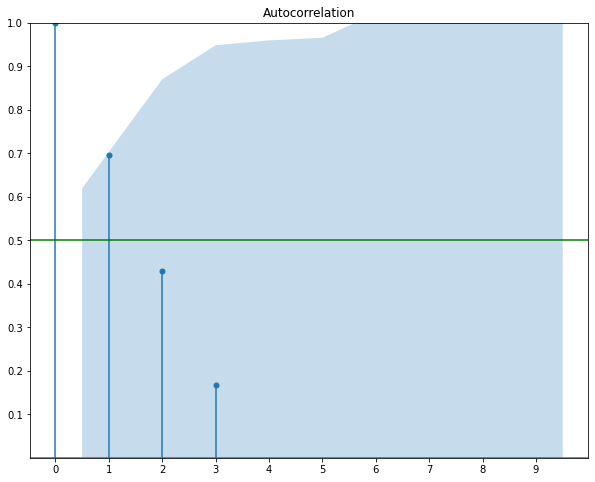

In [41]:
# finding the corealations and understanding the lags relations

fig, ax = plt.subplots(figsize=(10,8))
plot_acf(dfT['Paddy (Common) '], lags=9, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(0, 10, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [42]:
dfT.shape

(10, 30)

In [54]:
# print(X_crop)
# print(Y_crop)

### Algo using the temp dataset

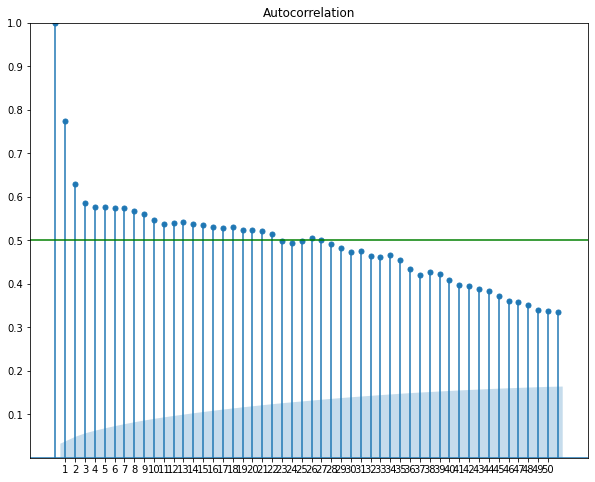

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
plot_acf(temp_df['Temp'], lags=51, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

C:\Users\cosmo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


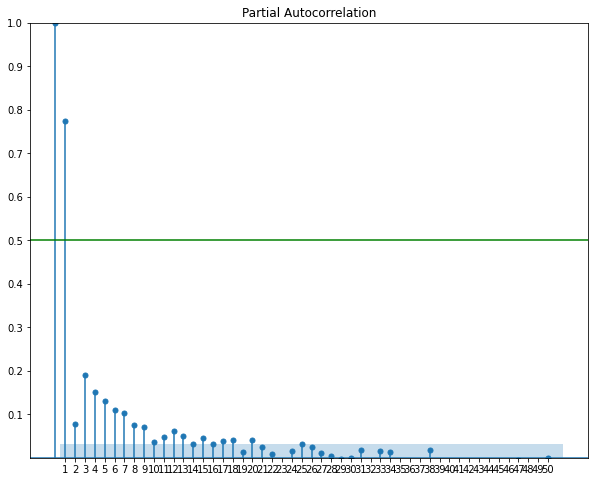

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
plot_pacf(temp_df['Temp'], lags=51, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [45]:
temp_df_train = temp_df['Temp'][:-5]
temp_df_test = temp_df['Temp'][-5:]

In [46]:
# !pip install statsmodels==0.13.1

In [47]:
diff = []
model = AutoReg(temp_df_train, lags=22).fit()
forecasts = model.forecast(5).tolist()

test_list = temp_df_test.tolist()
for i in range(len(forecasts)):
    difference = forecasts[i] - test_list[i]
    diff.append(difference)

In [48]:
mean_squared_error(test_list, forecasts)

1.1819584715502789

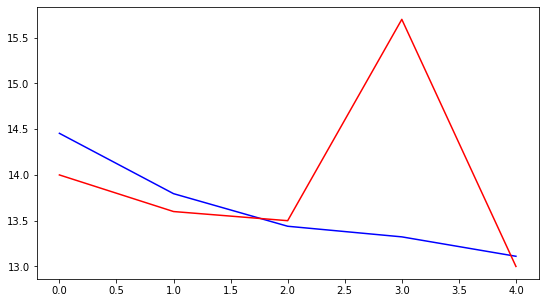

In [49]:
fig,ax = plt.subplots(figsize=(9,5))
plt.plot(forecasts,color='blue')
plt.plot(test_list,color='red')
plt.show()

### ARIMA

In [59]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [61]:
def adfuller_test(price):
    result = adfuller(price)
    labels = ['ADF_test_statistics', 'p_value', 'lags_used', 'Number_of_observations']
    
    for value,labels in zip(result, labels):
        print(labels + ':' + str(value))
        
adfuller_test(temp_df['Temp'])


ADF_test_statistics:-4.444804924611681
p_value:0.00024708263003611787
lags_used:20
Number_of_observations:3629


As P<= 0.05 , Null hypothesis is rejected. 
H0: The time series is not stationary.
H1: The time series is stationary.

In [98]:
x = temp_df['Temp'][:1500] 
y = temp_df['Temp'][1500:3000]

#### Thus the series is stationary

In [99]:
model_fit = ARIMA(x, order=(1,1,0)).fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 1500
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3672.736
Date:                Mon, 04 Jul 2022   AIC                           7349.472
Time:                        16:43:14   BIC                           7360.097
Sample:                             0   HQIC                          7353.430
                               - 1500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1798      0.023     -7.823      0.000      -0.225      -0.135
sigma2         7.8646      0.271     29.013      0.000       7.333       8.396
Ljung-Box (L1) (Q):                   3.65   Jarque-

In [109]:
y_pred = model_fit.fittedvalues
mean_squared_error(y_pred, y)

18.101037900849573

In [108]:
mean_absolute_error(y_pred, y)

3.325663656512169

In [117]:
diff = temp_df['Temp'] - temp_df['Temp'].shift()

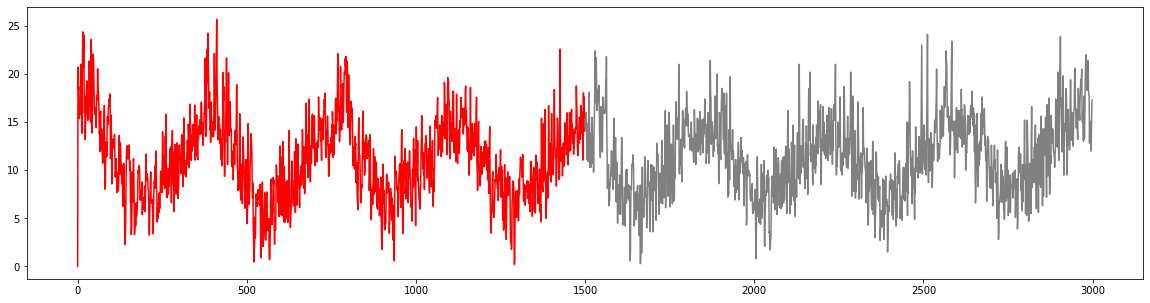

In [120]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(model_fit.fittedvalues, color='red')
# plt.plot(temp_df['Temp'], color='blue')
# plt.plot(diff, color='black')
plt.plot(y, color='grey')